# Capstone Project - Opening a Five-Star hotel in A Coruña
## The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction <a name="introduction"></a>

##### Background
A Coruña is a city located in the northwest of Spain. With an Atlantic climate (more rainy and cloudy than in other locations of Spain), the city does not apply for the typical Spanish Sun & Beach tourism model but has been traditionally working on attracting business and MICE tourism. This is important as the services around the accommodation are usually more important for this kind of tourists rather than a better location.

This means that the lodging industry in the area has been adapted to take these tourists and may have an adequate occupancy including one five-star hotel.

An opening of a new five-star hotel downtown could be beneficial for Coruña’s tourism cluster when promoting the destination in the media, and a great opportunity for any hotel chain that would like to get a footprint with a luxury hotel.

##### Problem
The data collected should contribute to determining the location where the five-star hotel should be located to compete (in equal conditions) with the new existing hotel, and the cost of its construction for a maximum duration of 1 year.

##### Interest
City’s tourism cluster and local authorities should be interested in this project as it could report a great impact in the city, not only in the tourists that could be attracted by an extended lodging offer but also because of the jobs this new hotel would create in Coruña. 
Also, a big hotel chain or investor should be interested as they would have an opportunity to lease this new property and added to their portfolio.


## Data <a name="data"></a>

##### Sources

With the following data, we should be able to figure out the location where the new five-star hotel should be built, how our hotel should be (number of rooms, number of meeting rooms, etc.) and how much the construction will cost.:
* Foursquare: With its API, I should be able to retrieve all the venues located in Coruña's downtown and separate them in differentiated clusters using the KNN method. The ideal scenario would be to divide the area into two clusters (one for our hotel and the other one for our competitor's)
* Instituto Galego de Estadística: This regional’s government site collects all the relevant macro data related to tourism. It will be useful to collect occupancies five-star hotels in the area (yearly and monthly) and see how stable is the tourism market and how many rooms will our hotel need to have the best efficiency.
* Turismo da Coruña: Local government site that collects information about hotels (among others). It will be useful to get data from our competitor and get an idea of the common areas, number of rooms, etc. that our hotel will need.
* Idealista.com: Most relevant Spanish websites to check rent prices.
* Hotelnewsresource.com: This website has a complete guide with the needs and estimated costs for building properties based on our needs (star rating, artwork, etc.). It will be useful to gather an average of how much will be the cost of the hotel's construction.


##### Formatting

Many datasets have been clean or modified to achieve the following:
* Remove unnecessary data from the data frames (e.g. min/max costs of renovations, as we already will display the average)
* Unify data language from all datasets to English
* Simplify data and get more accurate results (e.g. venues' categories)


### Loading Venues
First of all, let's load all the libraries we will need during our project and, then, find what are the top 99 venues in the target location.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
#import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Libraries imported.


In [2]:
address = 'Coruna, Spain'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coruña: {}, {}.'.format(latitude, longitude))

Coruña: 43.3712091, -8.3958768.


In [3]:
latitude=43.3712091
longitude=-8.3958768

In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [5]:
CLIENT_ID = 'IGUE2XDUJZ5BHKFPVARPPPMFFIAQZN2DEQ41BYQR0XU0UDRM' 
CLIENT_SECRET = '2XSTSCV1WCDVIMG4JFRNGP1AOBIV3IGJ2WFSPPVH2XZC33VN' 
VERSION = '20180605' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IGUE2XDUJZ5BHKFPVARPPPMFFIAQZN2DEQ41BYQR0XU0UDRM
CLIENT_SECRET:2XSTSCV1WCDVIMG4JFRNGP1AOBIV3IGJ2WFSPPVH2XZC33VN


In [6]:
LIMIT = 99 
radius = 500 
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=IGUE2XDUJZ5BHKFPVARPPPMFFIAQZN2DEQ41BYQR0XU0UDRM&client_secret=2XSTSCV1WCDVIMG4JFRNGP1AOBIV3IGJ2WFSPPVH2XZC33VN&v=20180605&ll=43.3712091,-8.3958768&radius=500&limit=99'

In [7]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eb5624cc94979001b318e56'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'A Coruña',
  'headerFullLocation': 'A Coruña',
  'headerLocationGranularity': 'city',
  'totalResults': 111,
  'suggestedBounds': {'ne': {'lat': 43.375709104500004,
    'lng': -8.38969784842627},
   'sw': {'lat': 43.3667090955, 'lng': -8.40205575157373}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5300d01f498e4f322a7c0085',
       'name': 'Saporita',
       'location': {'address': 'Calle la Franja 28',
        'lat': 43.37088133842945,
        'lng': -8.397919619951375,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.37088133842945,
          'ln

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [9]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

C:\Users\ggrana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Saporita,Italian Restaurant,43.370881,-8.397920
1,Praza de María Pita,Plaza,43.370820,-8.396052
2,Sweet Place,Cupcake Shop,43.370618,-8.396768
3,La Teresa,Burger Joint,43.370916,-8.394814
4,La Penela,Spanish Restaurant,43.370577,-8.395589


In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    

    
    return(nearby_venues)

To simplify our data frames, we will rename our venues categories. The result will be just 6 main categories.

In [11]:
nearby_venues = nearby_venues.replace("Italian Restaurant", "Restaurant")
nearby_venues = nearby_venues.replace("Plaza", "Tourist site")
nearby_venues = nearby_venues.replace("Cupcake Shop", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Burger Joint", "Restaurant")
nearby_venues = nearby_venues.replace("Spanish Restaurant", "Restaurant")
nearby_venues = nearby_venues.replace("Restaurant", "Restaurant")
nearby_venues = nearby_venues.replace("Ice Cream Shop", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Greek Restaurant", "Restaurant")
nearby_venues = nearby_venues.replace("Seafood Restaurant", "Restaurant")
nearby_venues = nearby_venues.replace("Theater", "Culture")
nearby_venues = nearby_venues.replace("Café", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Wine Bar", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Neighborhood", "Tourist site")
nearby_venues = nearby_venues.replace("Bar", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Frozen Yogurt Shop", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Creperie", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Gastropub", "Restaurant")
nearby_venues = nearby_venues.replace("Diner", "Restaurant")
nearby_venues = nearby_venues.replace("BBQ Joint", "Restaurant")
nearby_venues = nearby_venues.replace("Tapas Restaurant", "Restaurant")
nearby_venues = nearby_venues.replace("Nail Salon", "Drop")
nearby_venues = nearby_venues.replace("Jazz Club", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Pub", "Nightlife")
nearby_venues = nearby_venues.replace("Beer Garden", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Cocktail Bar", "Nightlife")
nearby_venues = nearby_venues.replace("Japanese Restaurant", "Restaurant")
nearby_venues = nearby_venues.replace("Bookstore", "Other")
nearby_venues = nearby_venues.replace("Hotel", "Hotel")
nearby_venues = nearby_venues.replace("Music Venue", "Culture")
nearby_venues = nearby_venues.replace("Brewery", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Tea Room", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Pharmacy", "Other")
nearby_venues = nearby_venues.replace("City Hall", "Tourist site")
nearby_venues = nearby_venues.replace("Coffee Shop", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Pizza Place", "Restaurant")
nearby_venues = nearby_venues.replace("Breakfast Spot", "Café/Refreshment")
nearby_venues = nearby_venues.replace("Garden", "Tourist site")
nearby_venues = nearby_venues.replace("Art Museum", "Culture")
nearby_venues = nearby_venues.replace("Other Nightlife", "Nightlife")
nearby_venues = nearby_venues.replace("Nightclub", "Nightlife")
nearby_venues = nearby_venues[nearby_venues.categories != 'Drop']

In [12]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [13]:
#Simpliying locations for further use in map creations
locations = nearby_venues[['lat', 'lng']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[0]

[43.37088133842945, -8.397919619951375]

And there we have the top venues that will help us determine the location of our hotel

In [14]:
nearby_venues.head(100)

,name,categories,lat,lng
0,Saporita,Restaurant,43.370881,-8.397920
1,Praza de María Pita,Tourist site,43.370820,-8.396052
2,Sweet Place,Café/Refreshment,43.370618,-8.396768
3,La Teresa,Restaurant,43.370916,-8.394814
4,La Penela,Restaurant,43.370577,-8.395589
5,Valentin,Restaurant,43.371380,-8.398947
6,Heladería Puerta Real,Café/Refreshment,43.369883,-8.395209
7,Restaurante Hellas,Restaurant,43.370147,-8.399208
8,Pablo Gallego,Restaurant,43.370544,-8.394962
9,Teatro Rosalía de Castro,Culture,43.370423,-8.398620


## Methodology <a name="methodology"></a>

Now that we have identified the venues in the target location, the next steps will be:
* Identify the clusters in the area where our hotel could be placed, and get to know the rent that needs to be paid in that area during the hotel's construction. 
* Determine the size of our hotel. The number of rooms needed in our property will have a great impact on the costs of the construction and, in the future, about the rent.
* Calculate the construction costs.

With all of this, we should be able to find out the total cost of our construction and present it to stakeholders.

## Analysis <a name="analysis"></a>

### Getting the KNNs
So, first of all, let's begin by checking out how many clusters we have based on the venues.

In [15]:
#Switch strings into integers for finding best K
X = nearby_venues.drop('name', axis=1)
X = X.replace("Café/Refreshment", 1)
X = X.replace("Restaurant", 2)
X = X.replace("Tourist site", 3)
X = X.replace("Culture", 4)
X = X.replace("Nightlife", 5)
X = X.replace("Other", 6)
X = X.replace("Hotel", 7)

In [16]:
y = nearby_venues['categories'].values

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh
yhat = neigh.predict(X_test)
yhat[0:11]
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78, 3) (78,)
Test set: (20, 3) (20,)


In [18]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.95, 0.95, 0.95,
       0.85, 0.85, 0.85])

In [19]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 1


Since all venues can be consolidated in one cluster but we want to compete in the same conditions as the existing hotel, we will divide venues into two clusters.

In [20]:
#Clustering
kclusters = 2
nearby_venues_clustering = nearby_venues.drop('categories', 1)
nearby_venues_clustering = nearby_venues_clustering.drop('name', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nearby_venues_clustering)
kmeans.labels_[0:10] 

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0])

In [21]:
#Defining cluster for each venue
nearby_venues.insert(0, 'Cluster Labels', kmeans.labels_)

Now we can have both clusters, and the location of our competitor (displayed by a marker). \
Our cluster will be the one inside the **red points** in the map below.

In [22]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=16)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['categories'], nearby_venues['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    folium.Marker([43.368842, -8.392758], popup='<b>Competitor hotel</b>').add_to(map_clusters)

    
       
map_clusters

In [23]:
c0 = nearby_venues.loc[nearby_venues['Cluster Labels'] == 0, nearby_venues.columns[[1,2] + list(range(5, nearby_venues.shape[1]))]]
c1 = nearby_venues.loc[nearby_venues['Cluster Labels'] == 1, nearby_venues.columns[[1,2] + list(range(5, nearby_venues.shape[1]))]]
c1 = c1[c1.categories != 'Hotel']
cl0 = c0['categories'].value_counts()
cl1 = c1['categories'].value_counts()
ct0=c0['categories'].count()
ct1=c1['categories'].count()

Just to get a better idea if we have a big disadvantage in any venue's category and the total amount of venues, we can compare both clusters as shown in the following graphs.

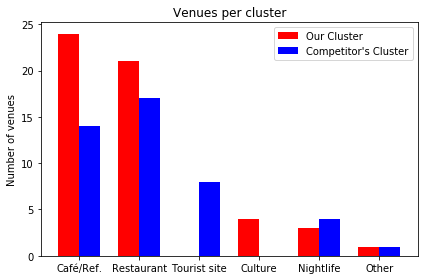

In [24]:
labels = ['Café/Ref.', 'Restaurant', 'Tourist site', 'Culture', 'Nightlife', 'Other']
zero = [24, 21, 0, 4, 3, 1]
one = [14, 17, 8, 0, 4, 1]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, zero, width, label='Our Cluster', color='red')
rects2 = ax.bar(x + width/2, one, width, label="Competitor's Cluster", color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of venues')
ax.set_title('Venues per cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

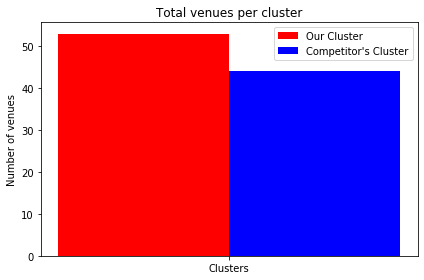

In [25]:
labels = ['Clusters']
x = np.arange(1)  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ct0, width, label='Our Cluster', color='red')
rects2 = ax.bar(x + width/2, ct1, width, label="Competitor's Cluster", color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of venues')
ax.set_title('Total venues per cluster')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

Below we can see the details of the venues' categories per cluster

In [26]:
print("Venues per category in our cluster:")
print(cl0)

Venues per category in our cluster:
Café/Refreshment    24
Restaurant          21
Culture              4
Nightlife            3
Other                1
Name: categories, dtype: int64


In [27]:
print("Venues per category in competitor's cluster:")
print(cl1)

Venues per category in competitor's cluster:
Restaurant          17
Café/Refreshment    14
Tourist site         8
Nightlife            4
Other                1
Name: categories, dtype: int64


### What will be the size of our hotel?

Now that we know the location of our hotel and we made sure we won't have a disadvantage on the services point of view, we need to find out how big our hotel should be to reduce our costs as much as possible. In a business hotel, its size is usually measured by the number of rooms it has, so we will try to get that number.

First, we load yearly occupancy data for 5-stars hotels in the area (the data will be really accurate as our competitor is the only 5-stars hotel). The yearly occupancy is not so relevant about getting the number of rooms we need but is a good indicator to measure if the market is stable, and we should trust data that will be gathered ahead.

In [28]:
#We load data for 5 stars hotels in the area, as this is the only one
#I formatted the data as it was loaded incorrectly
occ=pd.read_html('https://www.ige.eu/igebdt/esqv.jsp?ruta=verTabla.jsp?OP=1&B=1&M=&COD=2302&R=9928[108];3[2];0[2014:2015:2016:2017:2018]&C=2[0]&F=&S=&SCF=', skiprows=2, decimal=",")[0]
occ.columns = ['Year', 'Occupancy Rate']
ocr = occ['Occupancy Rate'].divide(10)
ocr.columns = ['Occupancy Rate']
occ = occ.drop(columns=['Occupancy Rate'])
occrate = pd.concat([occ, ocr], axis=1, sort=False)
occrate

,Year,Occupancy Rate
0,2014,57.6
1,2015,60.3
2,2016,62.1
3,2017,61.7
4,2018,60.2


Now, we will check the monthly occupancy during the last 3 years. 

In [29]:
avgocc=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/1588518713306.xls')
avgocc = avgocc.replace("Xaneiro", "January")
avgocc = avgocc.replace("Febreiro", "February")
avgocc = avgocc.replace("Marzo", "March")
avgocc = avgocc.replace("Abril", "April")
avgocc = avgocc.replace("Maio", "May")
avgocc = avgocc.replace("Xuño", "June")
avgocc = avgocc.replace("Xullo", "July")
avgocc = avgocc.replace("Agosto", "August")
avgocc = avgocc.replace("Setembro", "September")
avgocc = avgocc.replace("Outubro", "October")
avgocc = avgocc.replace("Novembro", "November")
avgocc = avgocc.replace("Decembro", "December")
avgocc= avgocc.rename(columns={"Mes": "Month"})
avgocc.columns=['Month', '2017', '2018', '2019']
avgocc

,Month,2017,2018,2019
0,January,29.2,33.4,35.0
1,February,34.1,38.9,39.1
2,March,39.1,41.3,39.6
3,April,50.8,47.3,48.2
4,May,43.1,46.7,53.3
5,June,51.7,52.8,56.1
6,July,71.8,70.3,71.6
7,August,82.3,83.0,83.0
8,September,58.4,57.5,61.3
9,October,50.3,50.4,53.3


In [30]:
print("Maximum occupancy per year:")
print(avgocc.max())

Maximum occupancy per year:
Month    September
2017          82.3
2018            83
2019            83
dtype: object


In the table, we see that A Coruña has a strong high season. As high season will bring big profits to the hotel, we don't want to miss the opportunity to have it on 100% full occupancy, so **we will need to have just the 83% rooms that our current competitor has**.\
That way, we will not have empty rooms and we will have fewer costs during our construction. Also, future investors will have to pay less rent, taxes, maintenance costs, etc.

Then, we need to figure out much space our competitor is using in common areas and adapt it to the size we just calculated.

In [31]:
#Hotel Finisterre common areas' size (one of them is a gym)
#Pulled and cleaned data(Comma decimal)
mr=pd.read_html('http://turismocoruna.com/web/corTurServer.php?idSecweb=97&idFicha=25548&idCategoria=48', header=1, decimal=',')[0]
mr.columns=['CommonAreas', 'SqMeters', 'Altura', 'Teatro','Escuela', 'Banquete', 'Forma "U"', 'Cocktail']
mr = mr.drop(['Altura', 'Teatro','Escuela', 'Banquete', 'Forma "U"', 'Cocktail'], axis=1)
mr = mr.drop([5,6])
mr1 = mr.drop([0, 1])
mr = mr.drop([2,3,4])
mr1['SqMeters'] = mr1['SqMeters'].divide(100)
mr= mr.append(mr1)
mr

,CommonAreas,SqMeters
0,Victoria,441.00
1,Miramar,180.00
2,Mindanao,98.26
3,Isla,83.43
4,Finisterre,85.36


In [32]:
nhrooms=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/RoomListFinisterre.xlsx')
nhrooms['TotalSqMeters'] = nhrooms.TotalRooms * nhrooms.SqMeters

In [33]:
print("Total size of competitor's common areas:", mr['SqMeters'].sum(), "m2")
print("Total size of competitor's room areas are:", nhrooms['TotalSqMeters'].sum(), "m2")

Total size of competitor's common areas: 888.0500000000001 m2
Total size of competitor's room areas are: 3449 m2


According to <a href="https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/alquiler/galicia/coruna-provincia/coruna/ciudad-vieja-centro/">Idealista</a>, one of the biggest real state sites in Spain, the price as to rent per May 3rd, 2020 is 9.2 EUR/m2

In [34]:
rent=((mr['SqMeters'].sum()*0.83)+(nhrooms['TotalSqMeters'].sum()*0.83))*9.2
rent=rent.round(2)
print("Monthly rent to be paid:",rent, "EUR")
print("Rent to be paid during reconstruction:",rent*12, "EUR")

Monthly rent to be paid: 33117.71 EUR
Rent to be paid during reconstruction: 397412.52 EUR


Now we know **the rent** during the next 12 months **will have a fixed cost of 397,412.52 EUR**.\
About the construction costs, from <a href="https://www.hotelnewsresource.com/pdf17/HVS061317.pdf">Hotel News Resource site</a> we have an example of the cost (in USD) to build/renovate an upscale hotel as the one we want.
So we can now load the data and adapt the costs as per the size of our hotel.

In [35]:
rawmr=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/x7MeetingRoomRenovation.xlsx') #7 meeting rooms
rawcorr=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/CorridorRenovation.xlsx') #cost per room
rawroom=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/RoomRenovation.xlsx') #cost per room
rawdining=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/RestaurantBarRenovation.xlsx') #cost per 195 rooms
rawbath=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/PubRestroomRenovation.xlsx')#cost per 195 rooms
rawlobby=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/LobbyRenovation.xlsx')#cost per 195 rooms
rawgym=pd.read_excel('https://github.com/ggrana90/Capstone-Project/raw/master/FitnessRenovation.xlsx')#cost per 195 rooms
rawmr=rawmr.drop(rawmr.columns[1], axis=1)
rawmr=rawmr.drop(rawmr.columns[1], axis=1)
rawcorr=rawcorr.drop(rawcorr.columns[1], axis=1)
rawcorr=rawcorr.drop(rawcorr.columns[1], axis=1)
rawroom=rawroom.drop(rawroom.columns[1], axis=1)
rawroom=rawroom.drop(rawroom.columns[1], axis=1)
rawdining=rawdining.drop(rawdining.columns[1], axis=1)
rawdining=rawdining.drop(rawdining.columns[1], axis=1)
rawbath=rawbath.drop(rawbath.columns[1], axis=1)
rawbath=rawbath.drop(rawbath.columns[1], axis=1)
rawlobby=rawlobby.drop(rawlobby.columns[1], axis=1)
rawlobby=rawlobby.drop(rawlobby.columns[1], axis=1)
rawgym=rawgym.drop(rawgym.columns[1], axis=1)
rawgym=rawgym.drop(rawgym.columns[1], axis=1)

In [36]:
#We calculate to mirror 
#Since we need to cover 83% of the total rooms from our competitor, we should have 76 rooms
rawmr['Average']= (rawmr['Average']/7)*4
rawcorr['Average']= rawcorr['Average']*76
rawroom['Average']= rawroom['Average']*76
rawdining['Average']= rawdining['Average']/195*76
rawbath['Average']= rawbath['Average']/195*76
rawlobby['Average']= rawlobby['Average']/195*76/195*76
rawgym['Average']= rawgym['Average']/195*76

In [37]:
#Total in USD
TotalUSD=rawmr['Average'].sum()+rawcorr['Average'].sum()+rawroom['Average'].sum()+rawdining['Average'].sum()+rawbath['Average'].sum()+rawlobby['Average'].sum()+rawgym['Average'].sum()
TotalEUR=TotalUSD*0.916635 #As per May 4th 2020
print("Building renovation cost is", TotalEUR.round(2), "EUR")

Building renovation cost is 4093987.68 EUR


The **building renovation cost**, with the criteria select, **is 4,093,987.68 EUR**.

In [38]:
#TOTAL
print("Total cost of the renting the land and construction of the hotel (scheduled to be completed in 12 months) is", TotalEUR.round(2)+rent*12, "EUR")

Total cost of the renting the land and construction of the hotel (scheduled to be completed in 12 months) is 4491400.2 EUR


So finally, we can sum both amounts and determine how much will our **hotel's total cost during its construction: 4,491,400.20 EUR**.
To see the impact of each feature in the construction, we can see below a bar chart with its breakdown.

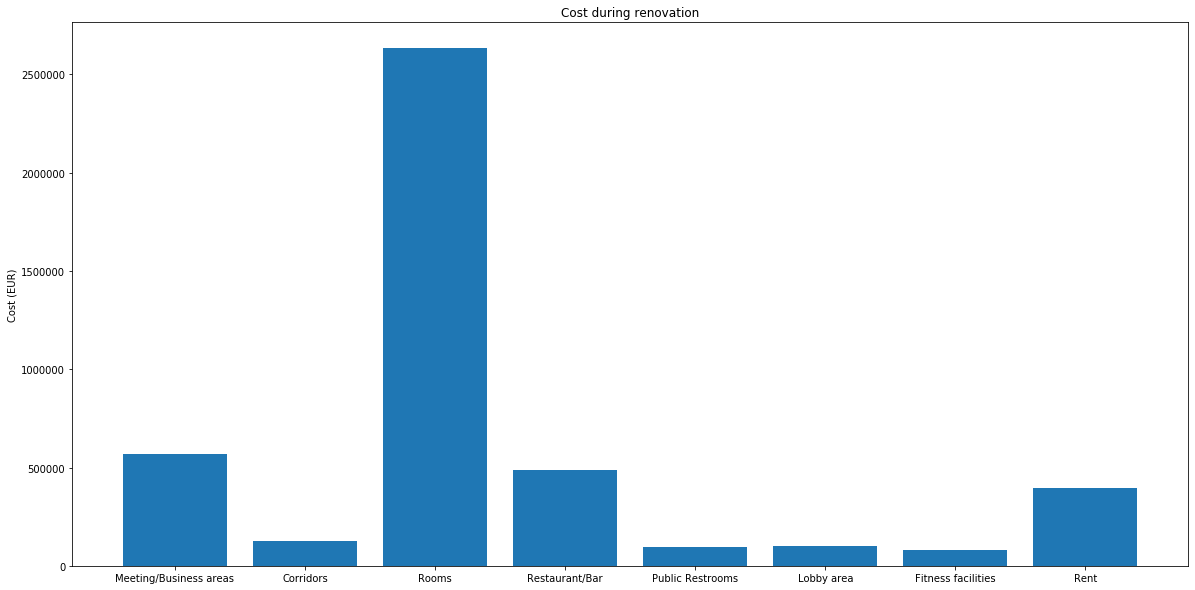

In [39]:
features = ('Meeting/Business areas', 'Corridors', 'Rooms', 'Restaurant/Bar', 'Public Restrooms', 'Lobby area', 'Fitness facilities','Rent')
y_pos = np.arange(len(features))
averages = [(rawmr['Average'].sum()*0.916635),(rawcorr['Average'].sum()*0.916635),(rawroom['Average'].sum()*0.916635),(rawdining['Average'].sum()*0.916635),(rawbath['Average'].sum()*0.916635),(rawlobby['Average'].sum()*0.916635),(rawgym['Average'].sum()*0.916635),rent*12]

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(y_pos, averages, align='center', alpha=1)
plt.xticks(y_pos, features)
plt.ylabel('Cost (EUR)')
plt.title('Cost during renovation')

plt.show()

## Results and Discussion <a name="results"></a>

The purpose of this project was to find the best location in downtown A Coruña to build a five-star hotel and calculate the estimation of the costs, before renting/selling it to a hotel chain or investor.

Knowing that there is only another five-star hotel in A Coruña and that venues are the most important services around a business hotel, we located the main venues in the area and divided them into two clusters: One that will belong to our hotel and our competitor.\
However, we needed to double-check the balance of those venues so we displayed them on different charts. The result was that our cluster would have a bigger amount of venues, while its distribution is somehow equal. The lack of tourist sites could be a problem in our neighbor and we weren't able to measure the impact, but it is being compensated with the number of cultural places we will have around.\
Then, we needed to figure out the costs of our hotel which will be based on size. So, to determine the size of the hotel we pulled data about the occupancies (average and maximum) in the last years for our competitor. As we found out that the market was stable and the maximum occupancy during high season was 83%, we assumed that our hotel should have a maximum of 83% the number of rooms (and therefore, common areas) our competitor has. This was the most important data gathered, as this assisted us to determine:
* How much will be the rent during the construction
* How much will the construction itself cost

Since we are having a better efficiency than our competitor, we should be able to decide in the future not just if we want to compete with them in terms of quality but also in price (we will have fewer maintenance costs as we will have fewer rooms/common areas).

## Conclusion <a name="conclusion"></a>

The data in the previous section has been pulled for building a luxury property, which has a little bit better quality than an average five-star hotel in Spain (and, consequently, better than our competitor), so there is still room to reduce our costs.
Our analysis says that if our investors decide we should lower the costs, we should start by the rooms as they are absorbing most of our expenses.

Also and to complement that, we should work on a follow-up program to this project to assist in attracting stakeholders to this acquisition.\
Mainly, this should consist of a feasibility study where we could calculate the time needed for the ROI, the average daily rate that we will need, how much of a positive impact it could have in the image (therefore the increase of reservations) in the acquirer chain, etc.